### aim: calculate the overturning circulation using cdftools package

### date: 

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [4]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

## renaming and looking

In [10]:
mtom = xr.open_dataset('/gpfs/home/mep22dku/cdftools/mesh_mask3_6.nc')
mukesm = xr.open_dataset('/gpfs/home/mep22dku/cdftools/mesh_mask_eORCA1_wrk.nc')
mtom.keys()

KeysView(<xarray.Dataset>
Dimensions:       (t: 1, x: 182, y: 149, z: 31)
Dimensions without coordinates: t, x, y, z
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    tmask         (t, z, y, x) int8 ...
    umask         (t, z, y, x) int8 ...
    vmask         (t, z, y, x) int8 ...
    fmask         (t, z, y, x) int8 ...
    tmaskutil     (t, y, x) int8 ...
    umaskutil     (t, y, x) int8 ...
    vmaskutil     (t, y, x) int8 ...
    fmaskutil     (t, y, x) int8 ...
    glamt         (t, y, x) float32 ...
    glamu         (t, y, x) float32 ...
    glamv         (t, y, x) float32 ...
    glamf         (t, y, x) float32 ...
    gphit         (t, y, x) float32 ...
    gphiu         (t, y, x) float32 ...
    gphiv         (t, y, x) float32 ...
    gphif         (t, y, x) float32 ...
    e1t           (t, y, x) float64 ...
    e1u           (t, y, x) float64 ...
    e1v          

In [6]:
mukesm

<xarray.Dataset>
Dimensions:       (x: 362, y: 332, z: 75)
Dimensions without coordinates: x, y, z
Data variables:
    e1f           (y, x) float64 ...
    e1t           (y, x) float64 ...
    e1u           (y, x) float64 ...
    e1v           (y, x) float64 ...
    e2f           (y, x) float64 ...
    e2t           (y, x) float64 ...
    e2u           (y, x) float64 ...
    e2v           (y, x) float64 ...
    ff            (y, x) float64 ...
    fmask         (z, y, x) int8 ...
    fmaskutil     (y, x) int8 ...
    gdepu         (z, y, x) float32 ...
    gdepv         (z, y, x) float32 ...
    glamf         (y, x) float32 ...
    glamt         (y, x) float32 ...
    glamu         (y, x) float32 ...
    glamv         (y, x) float32 ...
    gphif         (y, x) float32 ...
    gphit         (y, x) float32 ...
    gphiu         (y, x) float32 ...
    gphiv         (y, x) float32 ...
    isfdraft      (y, x) float32 ...
    mbathy        (y, x) int16 ...
    misf          (y, x) int16 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    nav_lon       (y, x) float32 ...
    time_counter  float64 ...
    tmask         (z, y, x) int8 ...
    tmaskutil     (y, x) int8 ...
    umask         (z, y, x) int8 ...
    umaskutil     (y, x) int8 ...
    vmask         (z, y, x) int8 ...
    vmaskutil     (y, x) int8 ...
    e3t           (z, y, x) float64 ...
    e3u           (z, y, x) float64 ...
    e3v           (z, y, x) float64 ...
    e3w           (z, y, x) float64 ...
    e3t_0         (z) float64 ...
    e3w_0         (z) float64 ...
    gdept,        (z, y, x) float32 ...
    gdepw         (z, y, x) float32 ...
    gdept_0       (z) float64 ...
    gdepw_0       (z) float64 ...
Attributes:
    file_name:                 mesh_mask.nc
    TimeStamp:                 13/01/2016 14:10:41 +0000
    NCO:                       4.3.2
    nco_openmp_thread_number:  1
    history:                   Wed Jan 13 16:57:27 2016: /project/ukmo/rhel6/...

## process annotation

`module add gcc/10.3.0`

`module add netcdf/4.7.4/gcc`

`cd /gpfs/home/mep22dku/cdftools`

`cp /gpfs/data/greenocean/software/runs/TOM12_RW_M90C/ORCA2_1m_19980101_19981231_grid_V.nc ./`

#### meshmask
`ln -sf mesh_mask3_6.nc mesh_hgr.nc`

`ln -sf mesh_mask3_6.nc mesh_zgr.nc`

`ln -sf mesh_mask3_6.nc mask.nc`

`./cdfmoc -v ORCA2_1m_19980101_19981231_grid_V.nc`

produces moc .nc

In [7]:
# import os
# import sys
# sys.path.append('cd /gpfs/home/mep22dku/cdftools')
# setup = False

# if setup:
#     os.system('cp /gpfs/home/mep22dku/cdftools/mesh_mask3_6.nc ./')
#     os.system('ln -sf mesh_mask3_6.nc mesh_hgr.nc')
#     os.system('ln -sf mesh_mask3_6.nc mesh_zgr.nc')
#     os.system('ln -sf mesh_mask3_6.nc mask.nc')
#     os.system('module add gcc/10.3.0')
#     os.system('module add netcdf/4.7.4/gcc`
# os.system('cp /gpfs/data/greenocean/software/runs/TOM12_RW_M90C/ORCA2_1m_19980101_19981231_grid_V.nc ./')


0

In [2]:
os.system('rm -f test.nc')

0

In [32]:
tmask['nav_lat'][:,80]

<xarray.DataArray 'nav_lat' (y: 149)>
array([-78.19058 , -77.7742  , -77.34337 , -76.89761 , -76.43644 , -75.95934 ,
       -75.46582 , -74.95534 , -74.42735 , -73.88131 , -73.31665 , -72.73279 ,
       -72.129135, -71.5051  , -70.86005 , -70.193375, -69.50445 , -68.792625,
       -68.05725 , -67.29768 , -66.51326 , -65.703316, -64.867195, -64.00423 ,
       -63.113754, -62.195126, -61.247692, -60.27082 , -59.263885, -58.226284,
       -57.15743 , -56.05677 , -54.923775, -53.75795 , -52.558838, -51.326035,
       -50.059177, -48.757957, -47.422142, -46.051548, -44.646076, -43.20571 ,
       -41.73051 , -40.220642, -38.67636 , -37.09803 , -35.48612 , -33.84122 ,
       -32.16404 , -30.455408, -28.716284, -26.947754, -25.151031, -23.327461,
       -21.478516, -19.605793, -17.71952 , -15.860321, -14.067597, -12.370966,
       -10.791196,  -9.341137,  -8.026655,  -6.847561,  -5.798548,  -4.870118,
        -4.049516,  -3.321665,  -2.670094,  -2.077874,  -1.528546,  -1.007058,
        -0.500692,   0.      ,   0.500692,   1.007058,   1.528546,   2.077874,
         2.670094,   3.321665,   4.049516,   4.870118,   5.798548,   6.847561,
         8.026655,   9.341137,  10.791196,  12.370966,  14.067597,  15.860321,
        17.71952 ,  19.605793,  21.4785  ,  23.326208,  25.144968,  26.931303,
        28.682095,  30.394676,  32.06685 ,  33.696888,  35.283535,  36.825954,
        38.323708,  39.77671 ,  41.185184,  42.5496  ,  43.87065 ,  45.1492  ,
        46.38624 ,  47.582848,  48.740192,  49.859467,  50.941887,  51.988678,
        53.00104 ,  53.980164,  54.92718 ,  55.84319 ,  56.729237,  57.586296,
        58.41527 ,  59.216988,  59.992184,  60.741493,  61.46544 ,  62.16443 ,
        62.838722,  63.48844 ,  64.11353 ,  64.713776,  65.28876 ,  65.83785 ,
        66.36026 ,  66.85497 ,  67.3208  ,  67.75641 ,  68.16036 ,  68.53118 ,
        68.86742 ,  69.167755,  69.43108 ,  69.65664 ,  69.84407 ,  69.99353 ,
        70.10575 ,  70.1821  ,  70.22474 ,  70.23724 ,  70.22474 ],
      dtype=float32)
Dimensions without coordinates: y

<xarray.Dataset>
Dimensions:       (depthw: 31, time_counter: 12, x: 1, y: 149)
Coordinates:
  * depthw        (depthw) float32 -0.0 -10.000015 ... -4500.0215 -5000.0
  * time_counter  (time_counter) object 1998-01-16 12:00:00 ... 1998-12-16 12...
Dimensions without coordinates: x, y
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    zomsfglo      (time_counter, depthw, y, x) float32 ...
    zomsfatl      (time_counter, depthw, y, x) float32 ...
    zomsfinp      (time_counter, depthw, y, x) float32 ...
    zomsfind      (time_counter, depthw, y, x) float32 ...
    zomsfpac      (time_counter, depthw, y, x) float32 ...
    zomsfinp0     (time_counter, depthw, y, x) float32 ...
Attributes:
    start_date:        -1
    output_frequency:  N/A
    CONFIG:            N/A
    CASE:              N/A
    history:           Partial step computation


Text(0, 0.5, 'depth (km)')

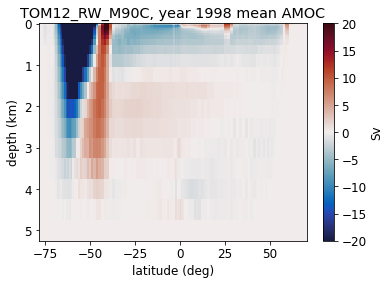

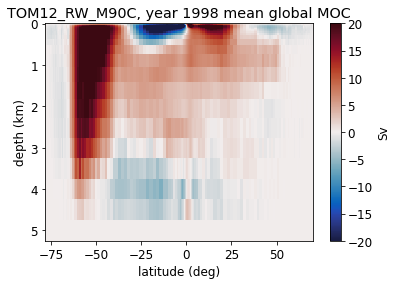

In [45]:
tmask = xr.open_dataset('/gpfs/home/mep22dku/cdftools/mesh_mask3_6.nc')
wdepths = (tmask['gdepw_1d'][0,:])
lats = tmask['nav_lat'][:,80]

w = xr.open_dataset('/gpfs/home/mep22dku/cdftools/moc.nc')

tw = np.nanmean(w['zomsfatl'].values, axis = 0)
plt.figure()
plt.gca().invert_yaxis()
q =plt.pcolormesh(lats, wdepths/1000, tw[:,:,0], vmin = -20, vmax = 20, cmap = cm.balance)
plt.colorbar(q, label = 'Sv')
plt.title('TOM12_RW_M90C, year 1998 mean AMOC')
plt.xlabel('latitude (deg)')
plt.ylabel('depth (km)')

tw = np.nanmean(w['zomsfglo'].values, axis = 0)
plt.figure()
plt.gca().invert_yaxis()
q =plt.pcolormesh(lats, wdepths/1000, tw[:,:,0], vmin = -20, vmax = 20, cmap = cm.balance)
plt.colorbar(q, label = 'Sv')
plt.title('TOM12_RW_M90C, year 1998 mean global MOC')
plt.xlabel('latitude (deg)')
plt.ylabel('depth (km)')


## making meshmask - notes from CDFteams

    CDFTOOLS assumes that the meshmask file is splitted into 3 files (mesh_hgr mesh_zgr and mask). This is a remnant of the time when netcdf was not supporting big files.  If you have a NEMO meshmask.nc  you can safely make the following links :

       ln -sf Your_mesh_mask.nc  mesh_hgr.nc
       ln -sf Your_mesh_mask.nc  mesh_zgr.nc
       ln -sf Your_mesh_mask.nc  mask..nc

    For new_maskglo.nc, it is  a file holding oceanic basins surface masks (at T point, ie : it is formed from tmask(:,:,1)  )

    For instance, for ORCA025 (global 1/4 deg )

    ncdump -h new_maskglo.nc
    netcdf new_maskglo {
    dimensions:
        x = 1442 ;
        y = 1021 ;
    variables:
        float tmaskatl(y, x) ;
        float tmaskpac(y, x) ;
        float tmaskmed(y, x) ;
        float tmaskind(y, x) ;
        float tmaskant(y, x) ;
        
moc in python: 
    https://git.geomar.de/open-source/meridional-overturning-circulation-from-nemo-output/-/blob/main/MOC.ipynb
    
read this slideshow at some point:
https://webspace.science.uu.nl/~dijks101/MPE-CDT/Jackson_MPE_2020.pdf
    


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    dimensions(sizes): X(182), Y(149)
    variables(dimensions): float32 X(Y,X), float32 Y(Y,X), float32 ATL(Y,X), float32 PAC(Y,X), float32 IND(Y,X), float32 SO(Y,X), float32 ARCTIC(Y,X), float32 P1(Y,X), float32 P2(Y,X), float32 P3(Y,X), float32 P4(Y,X), float32 P5(Y,X), float32 A1(Y,X), float32 A2(Y,X), float32 A3(Y,X), float32 A4(Y,X), float32 A5(Y,X), float32 I3(Y,X), float32 I4(Y,X), float32 I5(Y,X)
    groups: 


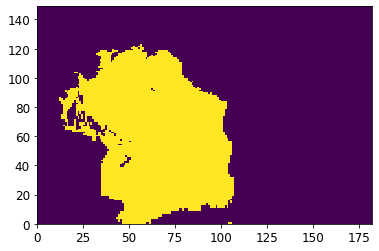

In [26]:
tmask = nc.Dataset('/gpfs/data/greenocean/software/resources/breakdown/clq_basin_masks_ORCA.nc')
print(tmask)
plt.pcolormesh(tmask['PAC'])

In [27]:
# dic_obs = np.zeros([3,4,31])
# alk_obs = np.zeros([3,4,31])
# define data with variable attributes
data_vars = {'tmaskpac':(['Y', 'X',], tmask['PAC'][:]),
             'tmaskatl':(['Y', 'X',], tmask['ATL'][:]),
             'tmaskind':(['Y', 'X',], tmask['IND'][:]),
       
            }

# define coordinates
# dimensions = {'X': (['X'], np.arange(0,182,1)),\
#          'Y': (['Y'], np.arange(0,149,1))}

# define global attributes
attrs = {'made in':'overturning/overturning_exploration.ipynb'
        }
            
# create dataset
ds = xr.Dataset(data_vars=data_vars)

fn = f'./new_maskglo.nc'
ds.to_netcdf(fn)

In [28]:
ds

<xarray.Dataset>
Dimensions:   (X: 182, Y: 149)
Dimensions without coordinates: X, Y
Data variables:
    tmaskpac  (Y, X) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    tmaskatl  (Y, X) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    tmaskind  (Y, X) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0

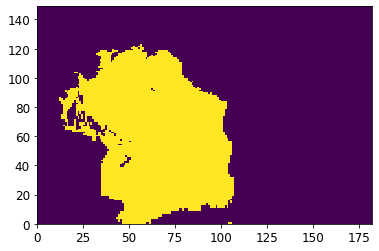

In [29]:
plt.pcolormesh(ds['tmaskpac'][:])

In [ ]:
w = xr.open_datase